In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_csv("loan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()
#returns total number of null values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

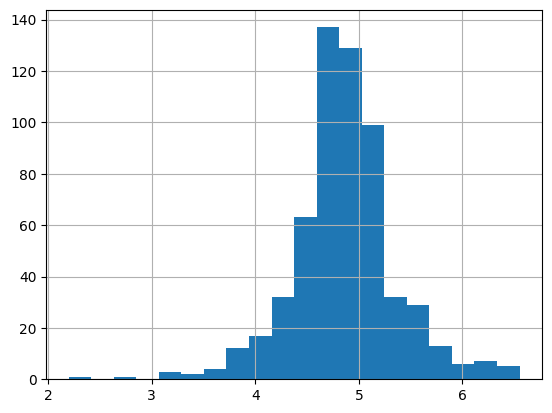

In [6]:
df['loanAmount_log']=np.log(df['LoanAmount'])
#calculates natural log of every element of the given array
df['loanAmount_log'].hist(bins=20)
#creates a histogram
# Bins are the buckets that your histogram will be grouped by. On the back end, Pandas will group your data into bins, or buckets. Then pandas will count how many values fell into that bucket, and plot the result.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
dtype: int64

<Axes: >

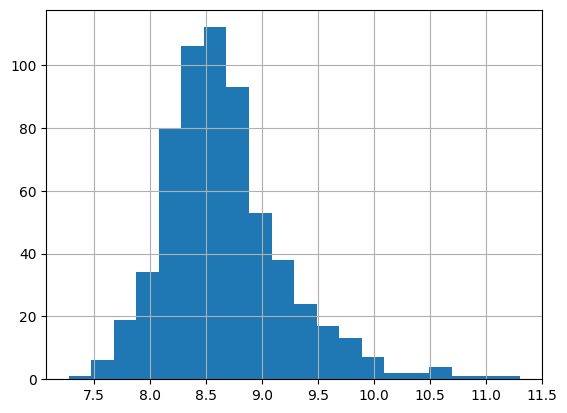

In [8]:
df['TotalIncome']=df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome']= np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [9]:
#FILLING of the NULL VALUES in all the Respective columns

df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log=df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
dtype: int64

In [10]:
#SELECTING OF SOME ROWS AND COLIMNS FOR TRAINING AND TESTING

x=df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values


#The iloc function from pandas module hepls us to select a specific row or column from the dataset. 
#Using iloc function we can easily retrieve a particular value from a row or column by using index values.


In [11]:
#Calculating Percentage of Missing Genders form Dataset

print("Percent of Missing Gender is  : %2f %%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of Missing Gender is  : 0.000000 %


Number of People who take loan as a group by Gender
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\1164107552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette ='Set2')


<Axes: xlabel='Gender', ylabel='count'>

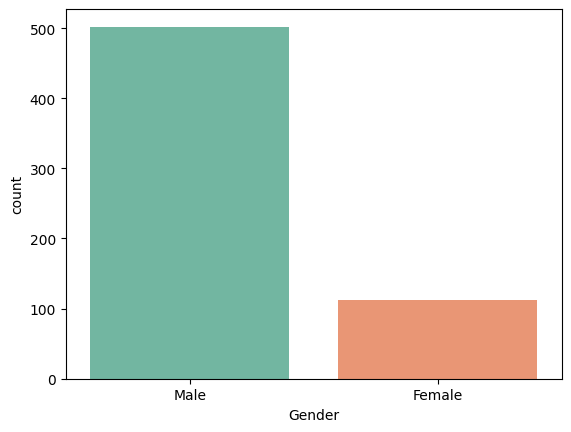

In [12]:
#Calculating Number of People who take loan as a group by Gender

print("Number of People who take loan as a group by Gender")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette ='Set2')

Number of People who take loan as a group by Marital Status
Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3659511538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette ='Set3')


<Axes: xlabel='Married', ylabel='count'>

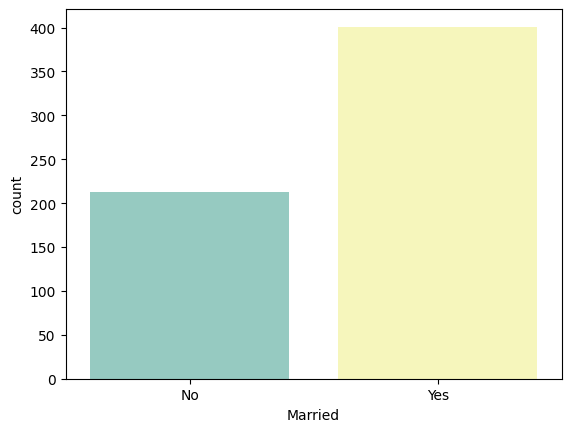

In [13]:
#Calculating Number of People who take loan as a group by Marital Status

print("Number of People who take loan as a group by Marital Status")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette ='Set3')

Number of People who take loan as a group by Dependents
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3399868233.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Dependents', ylabel='count'>

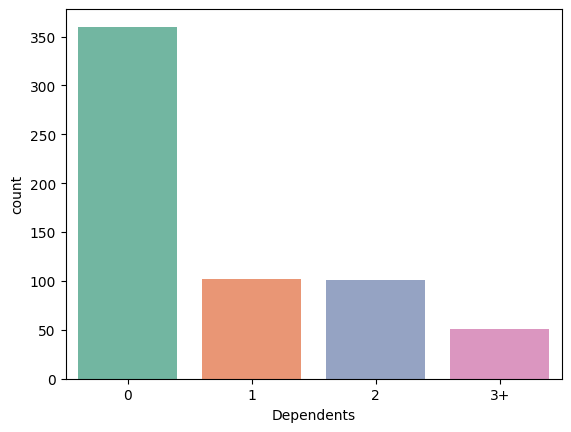

In [14]:
#Calculating Number of People who take loan as a group by Dependents

print("Number of People who take loan as a group by Dependents")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Self Employed
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\3186338063.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Self_Employed', ylabel='count'>

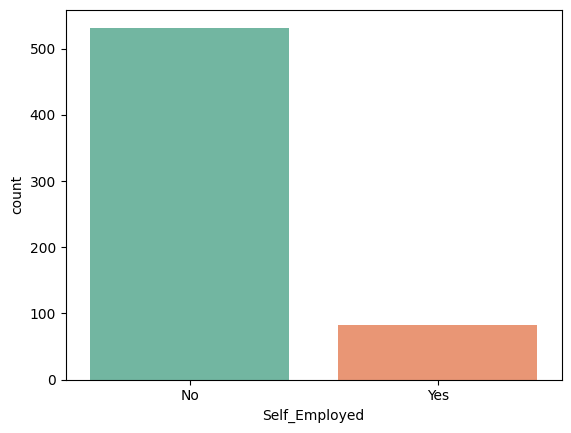

In [15]:
#Calculating Number of People who take loan as a group by Self Employed

print("Number of People who take loan as a group by Self Employed")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Loan Amount
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\801774087.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LoanAmount', data=df, palette ='Set2',legend=False)


<Axes: xlabel='LoanAmount', ylabel='count'>

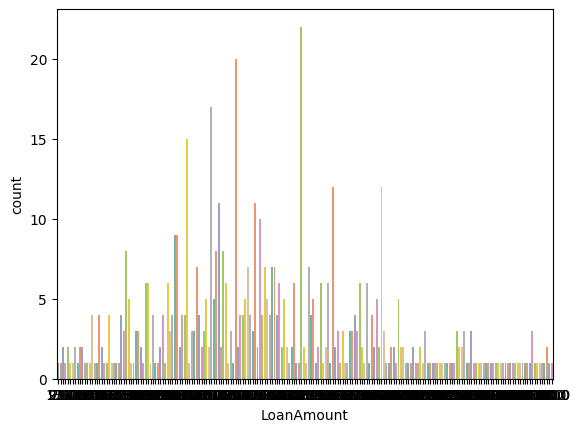

In [16]:
#Calculating Number of People who take loan as a group by Loan Amount

print("Number of People who take loan as a group by Loan Amount")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df, palette ='Set2',legend=False)

Number of People who take loan as a group by Credit History
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10452\1639041583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=df, palette ='Set2',legend=False)


<Axes: xlabel='Credit_History', ylabel='count'>

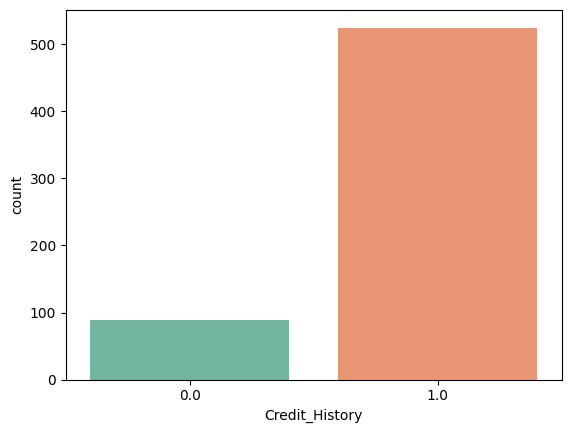

In [17]:
#Calculating Number of People who take loan as a group by Credit History

print("Number of People who take loan as a group by Credit History")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette ='Set2',legend=False)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
labelencoder_x=LabelEncoder()

#train_test_split function of sklearn model selection package in python splits arrays or matrices into random subsets for train and test data

#LabelEncoder encode label with a value between o and n-1 classes, where n is the number of distinct label

In [19]:
for i in range(0,5):
    x_train[:,i]=labelencoder_x.fit_transform(x_train[:,i])
    x_train[:,7]=labelencoder_x.fit_transform(x_train[:,7])

x_train

#fit_transform joins this two steps and is used for the initial fitting of the parameter on the training set while 
#also returning the transform X internally the transfer object just calls first fit and then transforms on the same data.

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [20]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [21]:
for i in range(0,5):
    x_test[:,i]=labelencoder_x.fit_transform(x_test[:,i])
    x_test[:,7]=labelencoder_x.fit_transform(x_test[:,7])

x_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [22]:
y_test=labelencoder_y.fit_transform(y_test)

y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [23]:
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

#StandardScaler removes the mean and scales the each feature variable to unit variance.This Operation performed feature-wise in an independent way.

In [27]:
#Lets see which classifier is best for prediction by comparing their accuracy.

from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

#A random forest Classifier is a meta estimator that employs averaging to increase prediction accuracy and reduce overfitting.

#If Boost = true , the size of the sub sample is determined by the max sample Argument otherwise each tree is constructed using the entire dataset.

RandomForestClassifier()

In [28]:
from sklearn import metrics

y_pred=rf_clf.predict(x_test)

print("acc of random forest clf is : ",metrics.accuracy_score(y_pred,y_test))

y_pred

# 1-loan_approved
# 0-loan_rejected

acc of random forest clf is :  0.7642276422764228


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [32]:
from sklearn.naive_bayes import GaussianNB

nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

#Naive_bayes is a classfication algorithm for binary two classes and multi classes classification problem it is called "naive" because the calculation of probabilities
# for each class are simplified to make that calculation tractable.

GaussianNB()

In [47]:
y_pred=nb_clf.predict(x_test)

print("acc of naive_bayes clf is : ",metrics.accuracy_score(y_pred,y_test))

y_pred

# 1-loan_approved
# 0-loan_rejected

acc of naive_bayes clf is :  0.8292682926829268


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

#Decsion Tree Clf is the non-parametric supervised learning approach used for classification and regression application. It is organized heirarichally as 
# no root branches, internal nodes and leaf nodes.

DecisionTreeClassifier()

In [48]:
y_pred=dt_clf.predict(x_test)
print("acc of decision tree clf is : ",metrics.accuracy_score(y_pred,y_test))
y_pred

# 1-loan_approved
# 0-loan_rejected

acc of decision tree clf is :  0.7073170731707317


array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [44]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(x_train,y_train)

#In K neighbors, the five closest neighbors are sought for the k neighbors classifier. The classifier must be explicitly instructed to utilize 
# Euclidean descent to determine the proximity of nearby points.

KNeighborsClassifier()

In [49]:
y_pred=kn_clf.predict(x_test)
print("acc of K Neighbors clf is : ",metrics.accuracy_score(y_pred,y_test))
y_pred

# 1-loan_approved
# 0-loan_rejected

acc of K Neighbors clf is :  0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

Hence Naive Bayes is used as it provides the best accuracy in prediction data.